In [1]:
import numpy as np
import matplotlib.pyplot as plt
from rad_trans import *
from read_lines import *

# Test #1

Read in values from the JPL database and compute needed parameters for the model, and compare these value to those of WEEDS. We are going to use CH3CN.

In [18]:
# Read in database data
lines = read_JPL('41001 CH3CN', 91.5, 100)
print(lines)

# Check the partition function
T_list, log_Q = read_JPLQ('CH3CN')
part_func = Q(113, T_list, log_Q)
print("\nlog10 of the partition function at 113 K from jpl is", np.log10(part_func))

   FREQ           EUP         GUP          Aij          
   MHz             K                      1 / s         
---------- ------------------ --- ----------------------
 91958.726 127.54255306550772  22 2.2780142552719265e-05
91971.1304  77.54550801186606  44  4.051412394070277e-05
91979.9943  41.82527599649492  22  5.318236681187473e-05
91985.3141  20.38991399713559  22 6.0794141284636084e-05
91987.0876 13.244169871900455  22  6.333233725197546e-05

log10 of the partition function at 113 K from jpl is 3.385433665868661


Below are the results from Weeds
![test1](ch3cn_values.png) 

Comparing my results with that of Weeds, we find that they agree

# Test #2
Compare the synthetic spectra of CH3OCHO from my radiative transfer model to the synthetic spectra from Weeds.

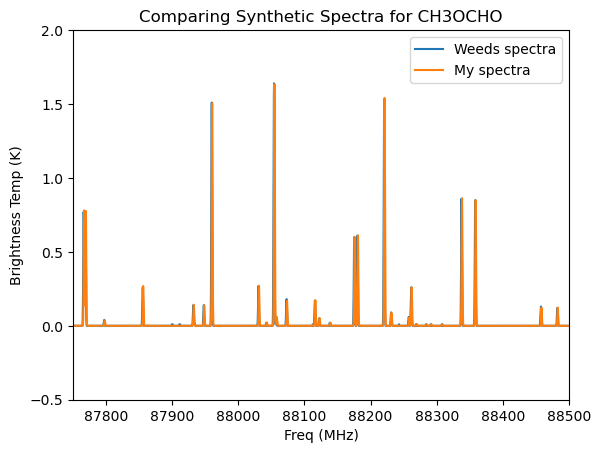

In [19]:
# Read in the Weeds synthetic spectra
weeds_data = np.loadtxt('LTE_spectrum_ch3ocho/1_LTE_spectrum_ch3ocho.alma.txt', skiprows=1)
freq = weeds_data[:,0]  # in MHz
intense = weeds_data[:,1]  # in K

spec_CH3OCHO = rad_trans('JPL', '60003 CH3OCHO', freq, 2.4e17, 160, 4.8, 1.22)

plt.plot(freq, intense, label= "Weeds spectra")
plt.plot(freq, spec_CH3OCHO, label= "My spectra")
plt.xlim(87750, 88500)
plt.ylim(-0.5, 2)
plt.xlabel('Freq (MHz)')
plt.ylabel('Brightness Temp (K)')
plt.title('Comparing Synthetic Spectra for CH3OCHO')
plt.legend()
plt.show()

Looking at spectra, they seem to agree very well

# Test #3
Compare the synthetic spectra of CH3OH from my radiative transfer model to the synthetic spectra from Weeds.

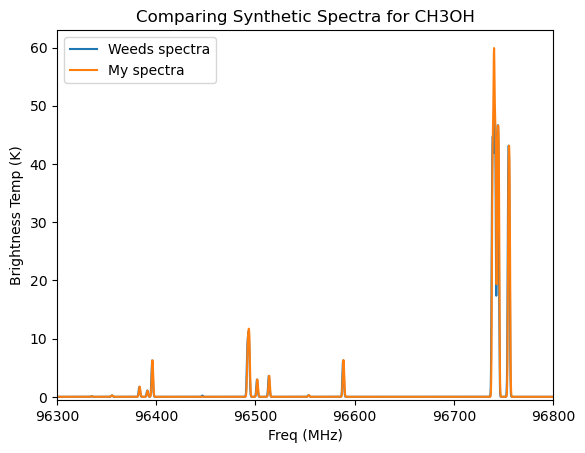

In [20]:
# Read in the Weeds synthetic spectra
weeds_data = np.loadtxt('LTE_spectrum_ch3oh/6_LTE_spectrum_ch3oh.alma.txt', skiprows=1)
freq = weeds_data[:,0]  # in MHz
intense = weeds_data[:,1]  # in K

spec_CH3OCHO = rad_trans('JPL', '32003 CH3OH', freq, 3.25e18, 113, 5, 0.5)

plt.plot(freq, intense, label= "Weeds spectra")
plt.plot(freq, spec_CH3OCHO, label= "My spectra")
plt.xlim(96300, 96800)
plt.ylim(-0.5, 63)
plt.xlabel('Freq (MHz)')
plt.ylabel('Brightness Temp (K)')
plt.title('Comparing Synthetic Spectra for CH3OH')
plt.legend()
plt.show()

Both spectra seem to agree very well